In [70]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from scipy.stats import ttest_ind
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import json
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [42]:
df = pd.read_csv('../../DATA/Ch12Ex13.csv', header=None).T

In [43]:
df['healthy'] = 0
df.loc[:19, 'healthy'] = 1
y = df['healthy']
X = df.drop('healthy', axis = 1)

In [44]:
#scaled = StandardScaler().fit_transform(df)

In [45]:
agg = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_distances=True)

In [46]:
agg.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='complete')

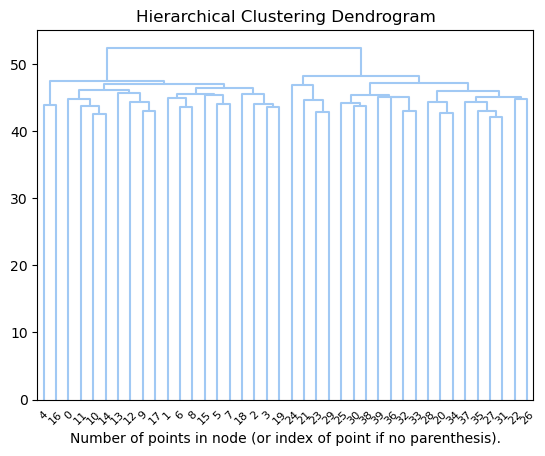

In [47]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [50]:
df['label'] = agg.labels_
pd.concat((df['healthy'], df['label']), axis=1)

,healthy,label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


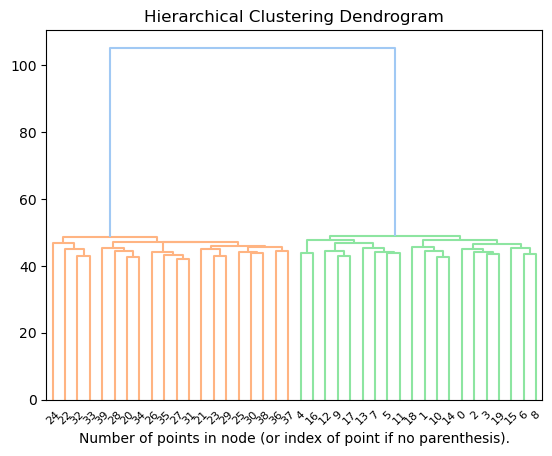

In [51]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_distances=True)
agg.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [52]:
df['label'] = agg.labels_
pd.concat((df['healthy'], df['label']), axis=1)

,healthy,label
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


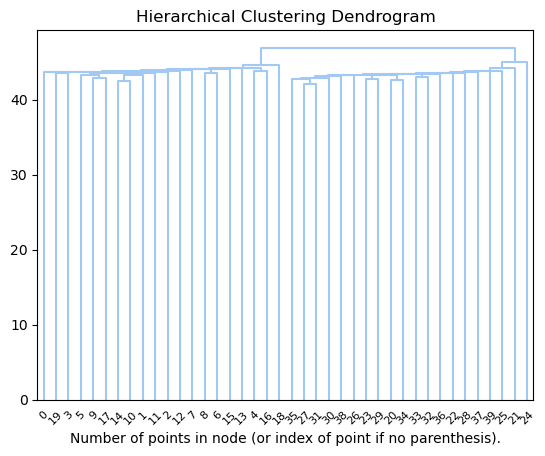

In [53]:
agg = AgglomerativeClustering(n_clusters=2, linkage='single', compute_distances=True)
agg.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [54]:
df['label'] = agg.labels_
pd.concat((df['healthy'], df['label']), axis=1)

,healthy,label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


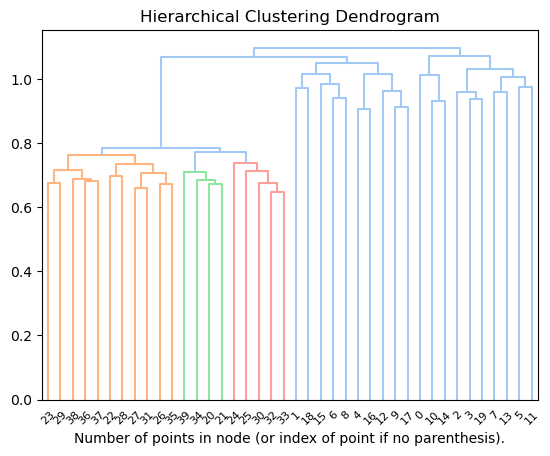

In [56]:
agg = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='correlation', compute_distances=True)
agg.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [57]:
df['label'] = agg.labels_
pd.concat((df['healthy'], df['label']), axis=1)

,healthy,label
0,1,0
1,1,1
2,1,0
3,1,0
4,1,1
5,1,0
6,1,1
7,1,0
8,1,1
9,1,1


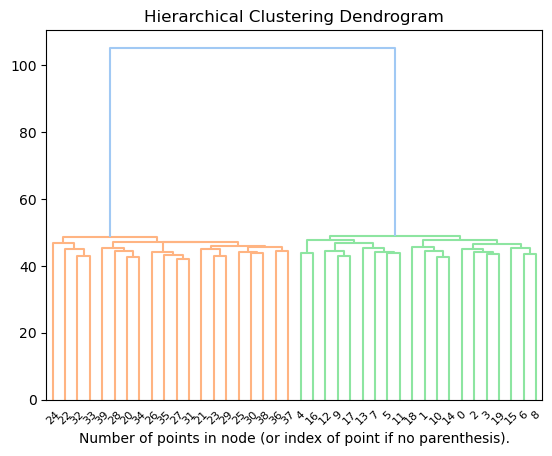

In [64]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_distances=True)
agg.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [65]:
df['label'] = agg.labels_
pd.concat((df['healthy'], df['label']), axis=1)

,healthy,label
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [66]:
# Null hypothesis : the two group have the same mean

In [67]:
group1 = X[df['label'] == 0]
group2 = X[df['label'] == 1]

In [91]:
from scipy.stats import ttest_ind

ttest_results = pd.DataFrame(ttest_ind(group1, group2)).T
ttest_results = ttest_results.rename(columns={0: 't-statistic', 1:'pvalue'})

array([[<Axes: title={'center': 't-statistic'}>,
        <Axes: title={'center': 'pvalue'}>]], dtype=object)

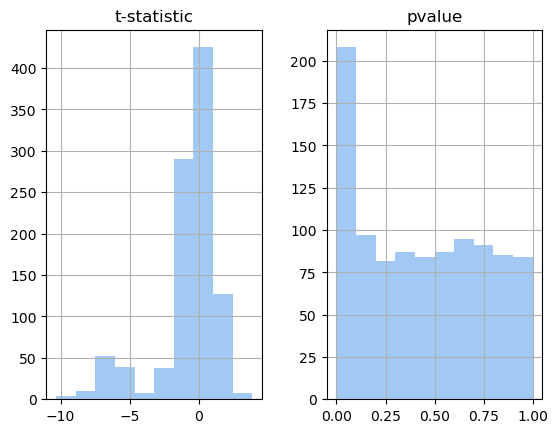

In [95]:
ttest_results.hist()

array([[<Axes: title={'center': 't-statistic'}>,
        <Axes: title={'center': 'pvalue'}>]], dtype=object)

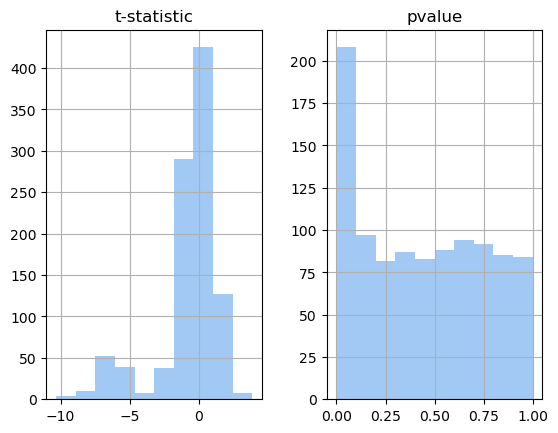

In [96]:
from scipy.stats import ttest_ind

ttest_results = pd.DataFrame(ttest_ind(group1, group2, equal_var=False)).T
ttest_results = ttest_results.rename(columns={0: 't-statistic', 1:'pvalue'})
ttest_results.hist()

In [107]:
ttest_results[ttest_results['pvalue'] < 0.05]

,t-statistic,pvalue
9,2.073426,4.631247e-02
10,-7.404124,7.205990e-09
11,-6.301778,2.211033e-07
12,-6.696192,6.572811e-08
13,-5.237733,7.028762e-06
...,...,...
852,-2.976235,5.054703e-03
859,-2.282579,2.819866e-02
899,-2.120735,4.057057e-02
938,-2.807974,7.939378e-03


In [109]:
# Let's use Bonferroni Correction !

ttest_results[ttest_results['pvalue'] < 0.05/len(ttest_results)]

,t-statistic,pvalue
10,-7.404124,7.205990e-09
11,-6.301778,2.211033e-07
12,-6.696192,6.572811e-08
13,-5.237733,7.028762e-06
14,-6.879027,4.803187e-08
...,...,...
595,-5.884759,8.256754e-07
596,-5.369961,4.194429e-06
597,-5.699003,1.569613e-06
598,-7.367140,7.887330e-09


In [126]:
# Let's use Homm approach :

ordered_pvalues = ttest_results['pvalue'].sort_values()
alpha = 0.05
m = len(ordered_pvalues)
for i in range(m):
    if ordered_pvalues.iloc[i] > (alpha/(m+1-(i+1))):
        print(i)
        break

105


In [130]:
ttest_results.iloc[ordered_pvalues[:105].index]

,t-statistic,pvalue
501,-10.316705,1.530472e-12
588,-10.024607,6.511864e-12
599,-9.623413,1.003599e-11
589,-8.976247,1.123456e-10
564,-8.628749,1.765864e-10
...,...,...
524,-4.979015,1.437347e-05
18,-4.930162,1.652808e-05
580,-4.816021,2.416647e-05
542,-4.821559,2.643552e-05


In [134]:
# Benjamini–Hochberg 

# Let's use Homm approach :
q = 0.1

ordered_pvalues = ttest_results['pvalue'].sort_values()
m = len(ordered_pvalues)
largest_i = 0
for i in range(m):
    if ordered_pvalues.iloc[i] < (q*(i+1))/m:
        largest_i = i
print(largest_i)

121


In [135]:
ttest_results.iloc[ordered_pvalues[:largest_i].index]

,t-statistic,pvalue
501,-10.316705,1.530472e-12
588,-10.024607,6.511864e-12
599,-9.623413,1.003599e-11
589,-8.976247,1.123456e-10
564,-8.628749,1.765864e-10
...,...,...
852,-2.976235,5.054703e-03
714,-2.808690,7.835028e-03
938,-2.807974,7.939378e-03
242,-2.767448,9.227378e-03
